In [ ]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

## 1. Loading Data:

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).



In [ ]:
#Loading data into dataframe

data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [ ]:
#Shape of dataframe

data.shape

(11054, 32)

In [ ]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [ ]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [ ]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [ ]:
#droping index column

data = data.drop(['Index'],axis = 1)

In [ ]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


##3. Feature Extraction 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Top 12 features:  Index(['PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'RequestURL',
       'AnchorURL', 'LinksInScriptTags', 'ServerFormHandler', 'AgeofDomain',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex'],
      dtype='object')
Accuracy on test set:  0.9499547784142297


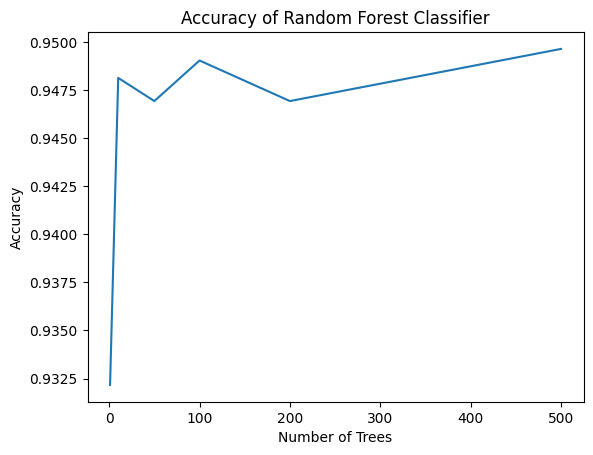

In [ ]:
# Select the URL-related features
url_features = data.iloc[:, :-1]

# Define the target variable
target = data.iloc[:, -1]

# Perform feature selection using ANOVA F-value as the criterion
k_best = SelectKBest(f_classif, k=12)
k_best.fit(url_features, target)

# Get the indices of the top 12 features
top_features = k_best.get_support(indices=True)

# Print the names of the top 12 features
feature_names = url_features.columns[top_features]
print("Top 12 features: ", feature_names)

# Train a random forest classifier on the selected features
X_train, X_test, y_train, y_test = train_test_split(url_features.iloc[:, top_features], target, test_size=0.3, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy)

# Create a chart of the accuracy on the test set
num_trees = [1, 10, 50, 100, 200, 500]
accuracy_scores = []

for n in num_trees:
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.plot(num_trees, accuracy_scores)
plt.title("Accuracy of Random Forest Classifier")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.show()

## 4. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

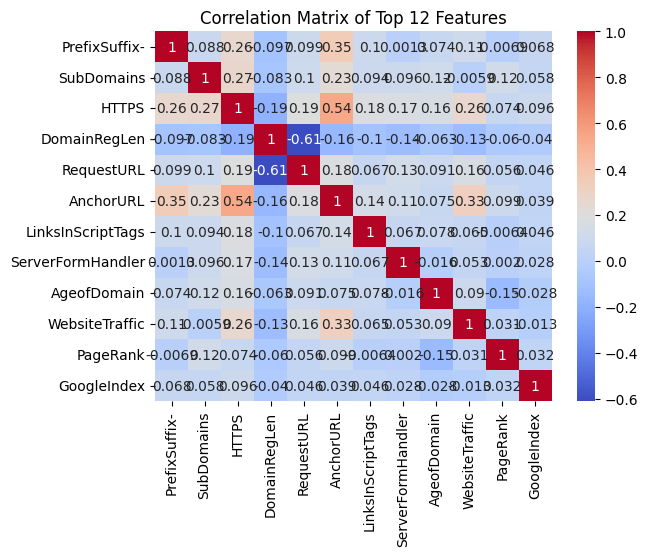

In [ ]:
# Plot a heatmap of the correlation matrix of the top 12 features
corr_matrix = url_features.iloc[:, top_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Top 12 Features")
plt.show()

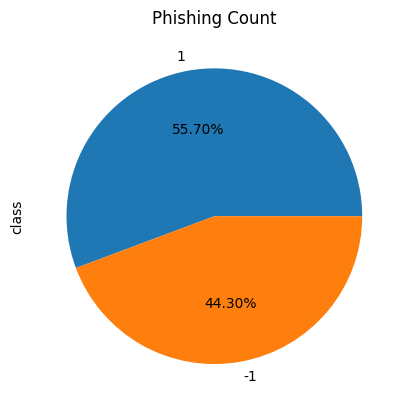

In [ ]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## 5. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [ ]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(url_features.iloc[:, top_features], target, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7737, 12), (7737,), (3317, 12), (3317,))

## 6. Model Building & Training:


1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Xgboost
9. Multilayer Perceptrons

              
  The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [ ]:
#  Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []


#function to call for storing the results
def storeResults(model, a,b,c,d):

  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

   


## 6.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [ ]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log,average='macro')
f1_score_test_log = metrics.f1_score(y_test,y_test_log,average='macro')
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log,average='macro')
recall_score_test_log = metrics.recall_score(y_test,y_test_log,average='macro')
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log,average='macro')
precision_score_test_log = metrics.precision_score(y_test,y_test_log,average='macro')
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.922
Logistic Regression : Accuracy on test Data: 0.918

Logistic Regression : f1_score on training Data: 0.921
Logistic Regression : f1_score on test Data: 0.916

Logistic Regression : Recall on training Data: 0.920
Logistic Regression : Recall on test Data: 0.915

Logistic Regression : precision on training Data: 0.923
Logistic Regression : precision on test Data: 0.918


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.92      0.89      0.91      1455
           1       0.92      0.94      0.93      1862

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



In [ ]:
import time


start_time = time.time()
log.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the test set and measure the testing time
start_time = time.time()
y_pred = log.predict(X_test)
testing_time = time.time() - start_time

# Print the training and testing time
print('Training time: {:.3f} seconds'.format(training_time))
print('Testing time: {:.3f} seconds'.format(testing_time))

Training time: 0.031 seconds
Testing time: 0.002 seconds


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

 

## 6.2. K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [ ]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [ ]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn,average='macro')
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn,average='macro')
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn,average='macro')
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn,average='macro')
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn,average='macro')
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn,average='macro')
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.961
K-Nearest Neighbors : Accuracy on test Data: 0.938

K-Nearest Neighbors : f1_score on training Data: 0.961
K-Nearest Neighbors : f1_score on test Data: 0.937

K-Nearest Neighborsn : Recall on training Data: 0.961
Logistic Regression : Recall on test Data: 0.937

K-Nearest Neighbors : precision on training Data: 0.961
K-Nearest Neighbors : precision on test Data: 0.938


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.94      0.92      0.93      1455
           1       0.94      0.95      0.95      1862

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



In [ ]:
import time


start_time = time.time()
knn.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the test set and measure the testing time
start_time = time.time()
y_pred = knn.predict(X_test)
testing_time = time.time() - start_time

# Print the training and testing time
print('Training time: {:.3f} seconds'.format(training_time))
print('Testing time: {:.3f} seconds'.format(testing_time))

Training time: 0.018 seconds
Testing time: 0.240 seconds


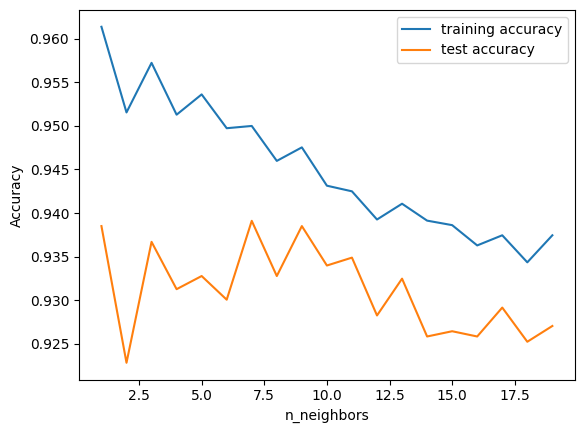

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)


## 6.3. Support Vector Machine : Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [ ]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [ ]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc,average='macro')
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc,average='macro')
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc,average='macro')
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc,average='macro')
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc,average='macro')
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc,average='macro')
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.945
Support Vector Machine : Accuracy on test Data: 0.939

Support Vector Machine : f1_score on training Data: 0.944
Support Vector Machine : f1_score on test Data: 0.938

Support Vector Machine : Recall on training Data: 0.943
Support Vector Machine : Recall on test Data: 0.937

Support Vector Machine : precision on training Data: 0.946
Support Vector Machine : precision on test Data: 0.940


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.94      0.92      0.93      1455
           1       0.94      0.96      0.95      1862

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



In [ ]:
import time


start_time = time.time()
svc.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the test set and measure the testing time
start_time = time.time()
y_pred = svc.predict(X_test)
testing_time = time.time() - start_time

# Print the training and testing time
print('Training time: {:.3f} seconds'.format(training_time))
print('Testing time: {:.3f} seconds'.format(testing_time))

Training time: 7.412 seconds
Testing time: 0.303 seconds


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

## 6.4. Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [ ]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb,average='macro')
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb,average='macro')
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb,average='macro')
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb,average='macro')
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb,average='macro')
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb,average='macro')
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.596
Naive Bayes Classifier : Accuracy on test Data: 0.591

Naive Bayes Classifier : f1_score on training Data: 0.558
Naive Bayes Classifier : f1_score on test Data: 0.555

Naive Bayes Classifier : Recall on training Data: 0.636
Naive Bayes Classifier : Recall on test Data: 0.636

Naive Bayes Classifier : precision on training Data: 0.762
Naive Bayes Classifier : precision on test Data: 0.759


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.94      0.92      0.93      1455
           1       0.94      0.96      0.95      1862

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



In [ ]:
import time


start_time = time.time()
nb.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the test set and measure the testing time
start_time = time.time()
y_pred = nb.predict(X_test)
testing_time = time.time() - start_time

# Print the training and testing time
print('Training time: {:.3f} seconds'.format(training_time))
print('Testing time: {:.3f} seconds'.format(testing_time))

Training time: 0.008 seconds
Testing time: 0.002 seconds


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

## 6.5. Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [ ]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [ ]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree,average='macro')
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree,average='macro')
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree,average='macro')
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree,average='macro')
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree,average='macro')
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree,average='macro')
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.969
Decision Tree : Accuracy on test Data: 0.944

Decision Tree : f1_score on training Data: 0.969
Decision Tree : f1_score on test Data: 0.943

Decision Tree : Recall on training Data: 0.969
Decision Tree : Recall on test Data: 0.942

Decision Tree : precision on training Data: 0.970
Decision Tree : precision on test Data: 0.944


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.94      0.93      0.94      1455
           1       0.95      0.96      0.95      1862

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



In [ ]:
import time


start_time = time.time()
tree.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the test set and measure the testing time
start_time = time.time()
y_pred = tree.predict(X_test)
testing_time = time.time() - start_time

# Print the training and testing time
print('Training time: {:.3f} seconds'.format(training_time))
print('Testing time: {:.3f} seconds'.format(testing_time))

Training time: 0.013 seconds
Testing time: 0.002 seconds


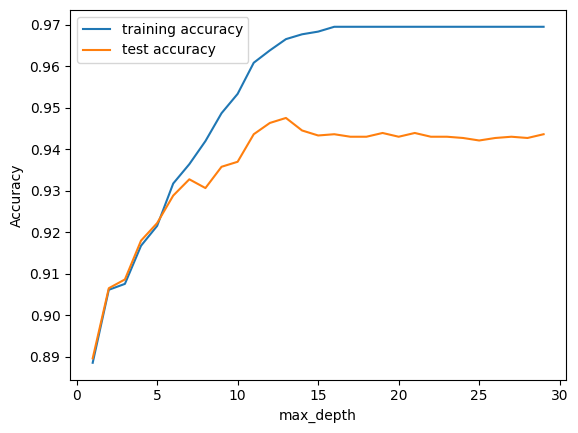

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

## 6.6. Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [ ]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest,average='macro')
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest,average='macro')
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest,average='macro')
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest,average='macro')
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest,average='macro')
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree,average='macro')
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.968
Random Forest : Accuracy on test Data: 0.949

Random Forest : f1_score on training Data: 0.968
Random Forest : f1_score on test Data: 0.948

Random Forest : Recall on training Data: 0.968
Random Forest : Recall on test Data: 0.947

Random Forest : precision on training Data: 0.969
Random Forest : precision on test Data: 0.944


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94      1455
           1       0.95      0.96      0.95      1862

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



In [ ]:
import time


start_time = time.time()
forest.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the test set and measure the testing time
start_time = time.time()
y_pred = forest.predict(X_test)
testing_time = time.time() - start_time

# Print the training and testing time
print('Training time: {:.3f} seconds'.format(training_time))
print('Testing time: {:.3f} seconds'.format(testing_time))

Training time: 0.049 seconds
Testing time: 0.008 seconds


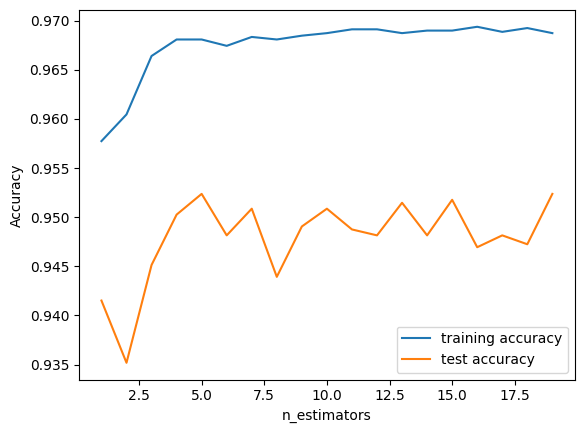

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

## 6.7.Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 

In [ ]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [ ]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc,average='macro')
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc,average='macro')
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc,average='macro')
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc,average='macro')
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc,average='macro')
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc,average='macro')
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.966
Gradient Boosting Classifier : Accuracy on test Data: 0.952

Gradient Boosting Classifier : f1_score on training Data: 0.966
Gradient Boosting Classifier : f1_score on test Data: 0.951

Gradient Boosting Classifier : Recall on training Data: 0.965
Gradient Boosting Classifier : Recall on test Data: 0.950

Gradient Boosting Classifier : precision on training Data: 0.967
Gradient Boosting Classifier : precision on test Data: 0.952


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.96      0.93      0.94      1455
           1       0.95      0.97      0.96      1862

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



In [ ]:
import time


start_time = time.time()
gbc.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the test set and measure the testing time
start_time = time.time()
y_pred = gbc.predict(X_test)
testing_time = time.time() - start_time

# Print the training and testing time
print('Training time: {:.3f} seconds'.format(training_time))
print('Testing time: {:.3f} seconds'.format(testing_time))

Training time: 0.698 seconds
Testing time: 0.013 seconds


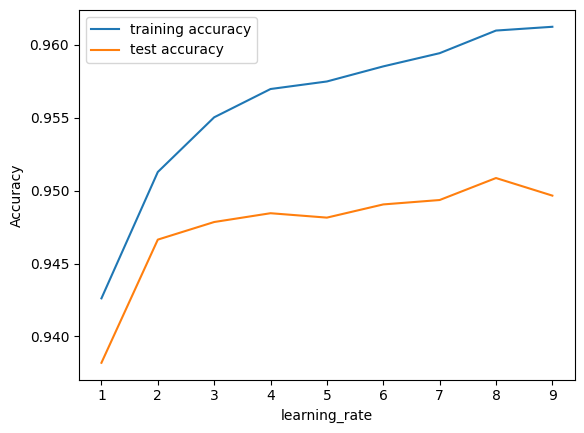

In [ ]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 6.9. XGBoost Classifier

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning. In this post you will discover how you can install and create your first XGBoost model in Python

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier



# map -1 to 0 and 1 to 1 in the target variable
y = np.where(y == -1, 0, 1)

# select the top 12 features using mutual information gain
selector = SelectKBest(mutual_info_classif, k=12)
selector.fit(X, y)
X_new = selector.transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb, average='macro')
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb, average='macro')
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb, average='macro')
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.963
XGBoost Classifier : Accuracy on test Data: 0.950

XGBoost Classifier : f1_score on training Data: 0.967
XGBoost Classifier : f1_score on test Data: 0.949

XGBoost Classifier : Recall on training Data: 0.957
XGBoost Classifier : Recall on test Data: 0.957

XGBoost Classifier : precision on training Data: 0.976
XGBoost Classifier : precision on test Data: 0.976


In [ ]:
import time


start_time = time.time()
xgb.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the test set and measure the testing time
start_time = time.time()
y_pred = xgb.predict(X_test)
testing_time = time.time() - start_time

# Print the training and testing time
print('Training time: {:.3f} seconds'.format(training_time))
print('Testing time: {:.3f} seconds'.format(testing_time))

Training time: 0.682 seconds
Testing time: 0.011 seconds


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

## 6.10. Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [ ]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [ ]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp,average='macro')
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp, average='macro')
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp,average='macro')
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp, average='macro')
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp,average='macro')
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp, average='macro')
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.959
Multi-layer Perceptron : Accuracy on test Data: 0.947

Multi-layer Perceptron : f1_score on training Data: 0.958
Multi-layer Perceptron : f1_score on test Data: 0.958

Multi-layer Perceptron : Recall on training Data: 0.959
Multi-layer Perceptron : Recall on test Data: 0.946

Multi-layer Perceptron : precision on training Data: 0.958
Multi-layer Perceptron : precision on test Data: 0.946


In [ ]:
import time


start_time = time.time()
mlp.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the test set and measure the testing time
start_time = time.time()
y_pred = mlp.predict(X_test)
testing_time = time.time() - start_time

# Print the training and testing time
print('Training time: {:.3f} seconds'.format(training_time))
print('Testing time: {:.3f} seconds'.format(testing_time))

Training time: 13.416 seconds
Testing time: 0.005 seconds


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

## 7. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                        # 'Training Time':training_time,
                        # 'Testing Time':testing_time,
                      })


In [ ]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.918,0.916,0.920,0.923
1,K-Nearest Neighbors,0.938,0.937,0.961,0.961
2,Support Vector Machine,0.939,0.938,0.943,0.946
3,Naive Bayes Classifier,0.591,0.555,0.636,0.762
4,Decision Tree,0.944,0.943,0.969,0.970
5,Random Forest,0.949,0.948,0.968,0.969
6,Gradient Boosting Classifier,0.952,0.951,0.965,0.967
7,XGBoost Classifier,0.950,0.949,0.957,0.976
8,Multi-layer Perceptron,0.947,0.946,0.959,0.958


In [ ]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [ ]:
# dispalying total result
sorted_result


,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.952,0.951,0.965,0.967
1,XGBoost Classifier,0.950,0.949,0.957,0.976
2,Random Forest,0.949,0.948,0.968,0.969
3,Multi-layer Perceptron,0.947,0.946,0.959,0.958
4,Decision Tree,0.944,0.943,0.969,0.970
5,Support Vector Machine,0.939,0.938,0.943,0.946
6,K-Nearest Neighbors,0.938,0.937,0.961,0.961
7,Logistic Regression,0.918,0.916,0.920,0.923
8,Naive Bayes Classifier,0.591,0.555,0.636,0.762


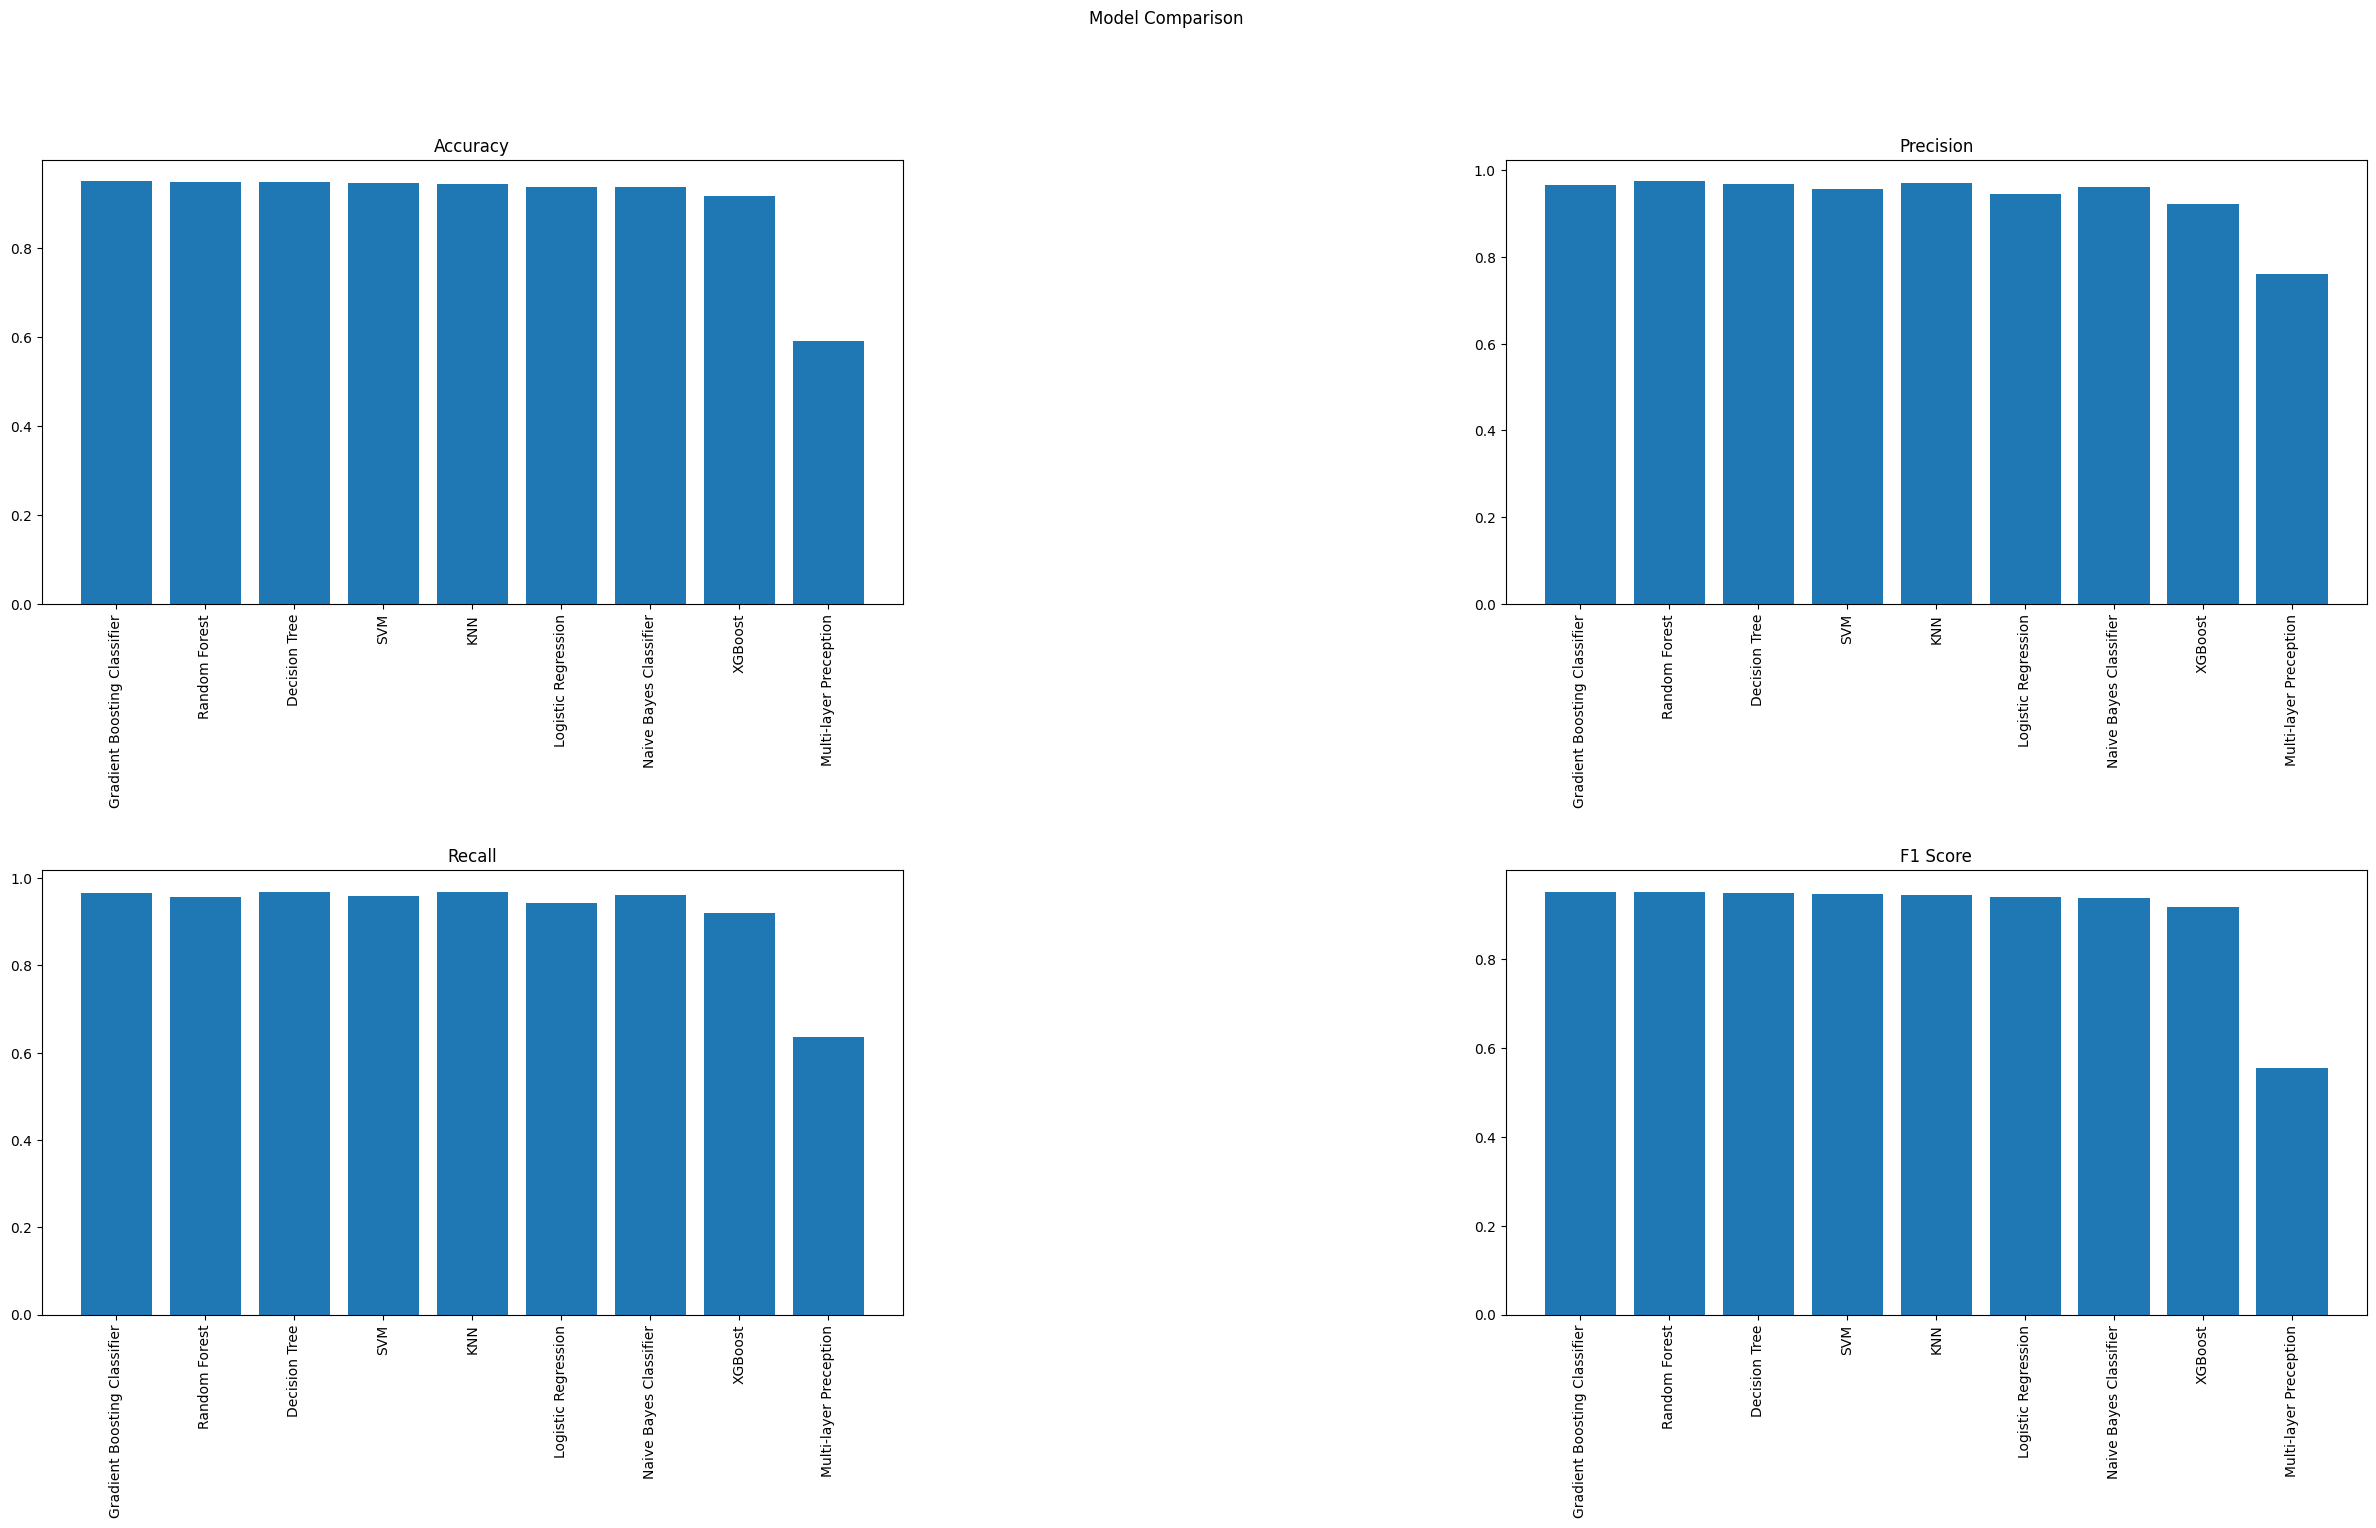

In [ ]:
import matplotlib.pyplot as plt

# Create a list of model names
model_names = ["Gradient Boosting Classifier", "Random Forest", "Decision Tree", "SVM","KNN","Logistic Regression","Naive Bayes Classifier","XGBoost","Multi-layer Preception"]
# Create a bar chart of the results for each metric
# fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig, axs = plt.subplots(2, 2, figsize=(30, 15))

axs[0, 0].bar(model_names, sorted_result['Accuracy'])
axs[0, 0].set_title("Accuracy")
axs[0, 1].bar(model_names, sorted_result['Precision'])
axs[0, 1].set_title("Precision")
axs[1, 0].bar(model_names, sorted_result['Recall'])
axs[1, 0].set_title("Recall")
axs[1, 1].bar(model_names, sorted_result['f1_score'])
axs[1, 1].set_title("F1 Score")

# Set the overall title
fig.suptitle("Model Comparison")


plt.xticks(fontsize=10)


for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Increase the gap between subplots
plt.subplots_adjust(wspace=0.7, hspace=0.6)


plt.show()

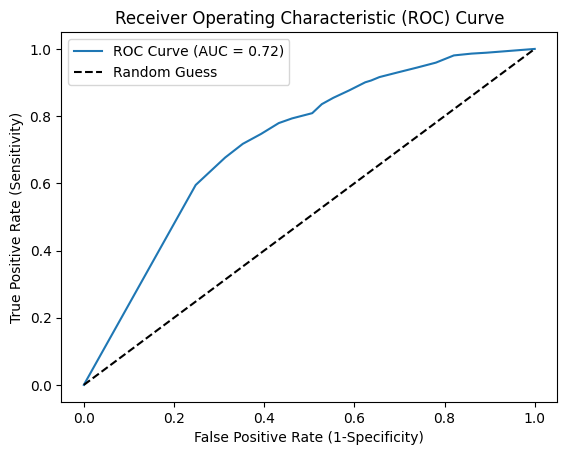

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

# Get the predicted probabilities for the test set
y_prob = knn.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = knn.predict(X_test)
# Compute the confusion matrix
# conf_mat = confusion_matrix(y_test, y_pred)

# # Extract the values
# tn = conf_mat[0, 0]
# fp = conf_mat[0, 1]
# fn = conf_mat[1, 0]
# tp = conf_mat[1, 1]
# # Compute the confusion matrix
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Compute the confusion matrix and unpack it
# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Extract the values
tn = conf_mat[0, 0]
fp = conf_mat[0, 1]
fn = conf_mat[1, 0]
tp = conf_mat[1, 1]




# Compute the evaluation metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = f1_score(y_test, y_pred,average='macro')
auc = roc_auc_score(y_test, y_pred,average='macro')

# Print the evaluation metrics
print('Confusion matrix:')
print(' TN  FP ')
print(' FN  TP ')
print(tn, fp)
print(fn, tp)

Confusion matrix:
 TN  FP 
 FN  TP 
0 0
599 0


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = log.predict(X_test)
# Compute the confusion matrix
# conf_mat = confusion_matrix(y_test, y_pred)

# # Extract the values
# tn = conf_mat[0, 0]
# fp = conf_mat[0, 1]
# fn = conf_mat[1, 0]
# tp = conf_mat[1, 1]
# # Compute the confusion matrix
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Compute the confusion matrix and unpack it
# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Extract the values
tn = conf_mat[0, 0]
fp = conf_mat[0, 1]
fn = conf_mat[1, 0]
tp = conf_mat[1, 1]




# Compute the evaluation metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = f1_score(y_test, y_pred,average='macro')
auc = roc_auc_score(y_test, y_pred,average='macro')

# Print the evaluation metrics
print('Confusion matrix:')
print(' TN  FP ')
print(' FN  TP ')
print(tn, fp)
print(fn, tp)

Confusion matrix:
 TN  FP 
 FN  TP 
0 0
259 0


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = gbc.predict(X_test)
# Compute the confusion matrix
# conf_mat = confusion_matrix(y_test, y_pred)

# # Extract the values
# tn = conf_mat[0, 0]
# fp = conf_mat[0, 1]
# fn = conf_mat[1, 0]
# tp = conf_mat[1, 1]
# # Compute the confusion matrix
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Compute the confusion matrix and unpack it
# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Extract the values
tn = conf_mat[0, 0]
fp = conf_mat[0, 1]
fn = conf_mat[1, 0]
tp = conf_mat[1, 1]




# Compute the evaluation metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = f1_score(y_test, y_pred,average='macro')
auc = roc_auc_score(y_test, y_pred,average='macro')

# Print the evaluation metrics
print('Confusion matrix:')
print(' TN  FP ')
print(' FN  TP ')
print(tn, fp)
print(fn, tp)

Confusion matrix:
 TN  FP 
 FN  TP 
0 0
883 0


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix

# Define the individual models
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = SVC()
model4 = GaussianNB()
model5 = DecisionTreeClassifier()
model6 = RandomForestClassifier()
model7 = GradientBoostingClassifier()
model8 = XGBClassifier()
model9 = MLPClassifier()

# Define the combined model
voting_clf = VotingClassifier(estimators=[
    ('lr', model1),
    ('knn', model2),
    ('svm', model3),
    ('nb', model4),
    ('dt', model5),
    ('rf', model6),
    ('gb', model7),
    ('xgb', model8),
    ('mlp', model9)], voting='hard')

# Train the combined model on the selected features
voting_clf.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
y_pred = voting_clf.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1381   74]
 [  99 1763]]


In [ ]:
from sklearn.metrics import matthews_corrcoef


log_preds = log.predict(X_test)
knn_preds = knn.predict(X_test)
tree_preds = tree.predict(X_test)
forest_preds = forest.predict(X_test)
svc_preds = svc.predict(X_test)
gbc_preds = gbc.predict(X_test)
xgb_preds = xgb.predict(X_test)
mlp_preds = mlp.predict(X_test)

# Combine the predictions into an array
all_preds = np.array([forest_preds, svc_preds, gbc_preds, xgb_preds, mlp_preds,log_preds,knn_preds,tree_preds])

# Compute the average prediction for each sample
combined_preds = np.mean(all_preds, axis=0) > 0.5
# Calculate MCC
mcc = matthews_corrcoef(y_test, combined_preds)
print("MCC: ", mcc)


MCC:  0.48207057412715376


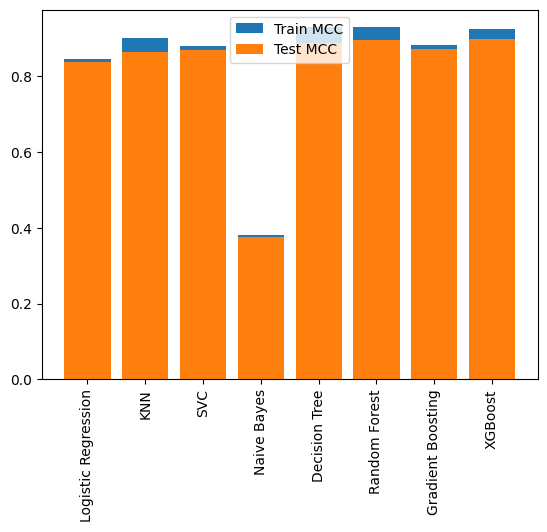

In [ ]:
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt

models = [LogisticRegression(), KNeighborsClassifier(), SVC(), GaussianNB(), DecisionTreeClassifier(),          RandomForestClassifier(), GradientBoostingClassifier(), XGBClassifier()]
model_names = ['Logistic Regression', 'KNN', 'SVC', 'Naive Bayes', 'Decision Tree', 'Random Forest',               'Gradient Boosting', 'XGBoost']

train_mccs = []
test_mccs = []

for model in models:
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_mcc = matthews_corrcoef(y_train, train_preds)
    test_mcc = matthews_corrcoef(y_test, test_preds)
    train_mccs.append(train_mcc)
    test_mccs.append(test_mcc)

plt.bar(model_names, train_mccs, label='Train MCC')
plt.bar(model_names, test_mccs, label='Test MCC')
plt.legend()
plt.xticks(rotation=90)
plt.show()




In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import matthews_corrcoef

# Split the data into features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Instantiate the models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]
# Modify class labels
y[y == -1] = 0

# Train and evaluate each model
for model in models:
    model.fit(X, y)
    y_pred = model.predict(X)
    mcc = matthews_corrcoef(y, y_pred)
    print(f'MCC for {type(model).__name__}: {mcc}')



MCC for LogisticRegression: 0.8546619559932382
MCC for KNeighborsClassifier: 0.9336105937825326
MCC for SVC: 0.9074791589581455
MCC for GaussianNB: 0.38908465140270004
MCC for DecisionTreeClassifier: 0.9791044747727244
MCC for RandomForestClassifier: 0.9791031440788325
MCC for GradientBoostingClassifier: 0.9022320848012528
MCC for XGBClassifier: 0.9703113266521933
